In [1]:
import pickle
import pandas as pd
import numpy as np

with open('./DF_genres_hashed.pkl', 'rb') as f:
    df = pickle.load(f)

In [2]:
df["genres"].value_counts()

['baroque', 'classical', 'early music', 'german baroque']     3654
['classical', 'classical era']                                1907
['cartoon','children's music']                                1468
['smooth jazz']                                               1274
['edm', 'progressive house', 'trance']                        1131
                                                              ... 
['alternative r&b', 'deep pop r&b', 'trap soul']                 1
['chinese indie']                                                1
['perreo', 'pop reggaeton', 'reggaeton', 'reggaeton flow']       1
['funk carioca', 'sertanejo pop']                                1
['banda', 'deep regional mexican', 'norteno']                    1
Name: genres, Length: 20720, dtype: int64

In [3]:
df.head()

,acousticness,artist,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,40,41,42,43,44,45,46,47,48,49
0,0.001300,Karkkiautomaatti,0.487,157307.0,0.678,0.055100,9.0,0.0846,-7.780,1.0,...,0.0,-1.0,1.0,2.0,-3.0,0.0,0.0,0.0,0.0,-2.0
1,0.000045,Hudson Mohawke,0.662,138960.0,0.823,0.952000,4.0,0.3430,-1.711,0.0,...,0.0,-4.0,5.0,7.0,-4.0,-1.0,0.0,0.0,0.0,-7.0
2,0.002760,Kris Kross,0.859,221200.0,0.741,0.000000,11.0,0.3250,-12.329,0.0,...,0.0,-3.0,0.0,1.0,-2.0,-1.0,0.0,0.0,0.0,-1.0
3,0.348000,Jorge Negrete,0.361,173573.0,0.483,0.000003,7.0,0.1770,-6.875,1.0,...,0.0,-2.0,1.0,2.0,-1.0,2.0,0.0,0.0,0.0,0.0
4,0.340000,Tiger Lou,0.533,318467.0,0.302,0.179000,10.0,0.1110,-10.308,1.0,...,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-2.0


In [4]:
all_genres = []
for genre_list in df["genres"]:
    genre_list = genre_list.split(",")
    for genre in genre_list:
        genre = genre.strip("[",)
        genre = genre.strip("]",)
        genre = genre.strip()
        all_genres.append(genre)

In [5]:
len(all_genres)

2110517

In [6]:
import pandas as pd
import numpy as np

In [7]:
df_genres = pd.DataFrame(all_genres,columns=['genres'])

# Picking DF_Genres Dataframe

In [8]:
pickle.dump(df_genres, open("./data/DF_Genres_List_v1.pkl","wb"))

# pickle.dump( df_genres_hashed, open( "DF_genres_hashed.pkl", "wb" ) )

In [103]:
df_genres["genres"].value_counts()

'rock'                  22625
'mellow gold'           12409
'dance pop'             12358
'country rock'          12306
'soft rock'             12065
                        ...  
'fremantle indie'           1
'murga'                     1
'deep eurodance'            1
'tunisian pop'              1
'african electronic'        1
Name: genres, Length: 3488, dtype: int64

# Feature Engineering

Goal - have only the highest occuring genre in 'genres' column.

In [43]:
df_genres["genres"].value_counts()[0:4]

'rock'            22625
'mellow gold'     12409
'dance pop'       12358
'country rock'    12306
Name: genres, dtype: int64

In [48]:
df["genres"][0:1]

0    ['finnish indie', 'suomi rock']
Name: genres, dtype: object

In [67]:
((df_genres["genres"].value_counts().index=='rock').tolist()).index(False)

0

In [8]:
unique_genres = set(df_genres["genres"])

In [9]:
len(unique_genres)

3488

In [10]:
df_genres

,genres
0,'finnish indie'
1,'suomi rock'
2,'bass music'
3,'scottish electronic'
4,'scottish hip hop'
...,...
2110512,'stomp and holler'
2110513,'ccm'
2110514,'christian music'
2110515,'world worship'


In [39]:
df.head()

,acousticness,artist,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,songid,speechiness,tempo,time_signature,track,valence,genres
0,0.000962,Karkkiautomaatti,0.360344,157307.0,0.501670,0.040770,9.0,0.062598,-7.780,1.0,5PS5dpaLogPzYU9hWiWyZb,0.036626,0.444028,4.0,Tanssi vaan,0.643736,"['finnish indie', 'suomi rock']"
1,0.000026,Hudson Mohawke,0.379957,138960.0,0.472364,0.546404,4.0,0.196866,-1.711,0.0,41RpZW2lxAdnqDd2nMBzLQ,0.037996,0.408300,4.0,No One Could Ever,0.356425,"['bass music', 'scottish electronic', 'scottis..."
4,0.002002,Kris Kross,0.623189,221200.0,0.537582,0.000000,11.0,0.235782,-12.329,0.0,3GsS8jzoixpCnp4jDWCEvb,0.196606,0.284787,4.0,2 Da Beat Ch'yall,0.383780,"['hip hop', 'new jack swing', 'rap']"
5,0.328076,Jorge Negrete,0.340331,173573.0,0.455346,0.000003,7.0,0.166866,-6.875,1.0,0kq75szR7uDEYrZkT2c4Ry,0.027057,0.356702,4.0,El hijo del pueblo,0.642953,"['bolero', 'mariachi', 'ranchera']"
6,0.355561,Tiger Lou,0.557394,318467.0,0.315822,0.187192,10.0,0.116080,-10.308,1.0,2HyFpkX9J7vv3OZNDaraHZ,0.032105,0.564862,3.0,Pilots,0.307456,['swedish indie rock']


# Feature Hashing

In [5]:
from sklearn.feature_extraction import FeatureHasher

In [7]:
fh = FeatureHasher(input_type='string',n_features=50)
hashed_features = fh.fit_transform(df['genres_stripped'])
hashed_features = hashed_features.toarray()
df_genres_hashed = pd.concat([df, pd.DataFrame(hashed_features)], 
          axis=1)

In [8]:
pickle.dump( df_genres_hashed, open( "DF_genres_hashed.pkl", "wb" ) )

# Genre Clustering

In [11]:
df["genres_stripped"]

0                             'finnish indie', 'suomi rock'
1         'bass music', 'scottish electronic', 'scottish...
2                        'hip hop', 'new jack swing', 'rap'
3                          'bolero', 'mariachi', 'ranchera'
4                                      'swedish indie rock'
                                ...                        
574013    'art pop', 'brooklyn indie', 'chamber pop', 'd...
574014                                        'lo-fi beats'
574015    'contemporary country', 'country pop', 'heartl...
574016    'garage rock', 'indie pop', 'indie rock', 'mod...
574017    'ccm', 'christian music', 'world worship', 'wo...
Name: genres_stripped, Length: 574018, dtype: object

# Embedding

In [16]:
import ast
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import MeanShift, KMeans, AffinityPropagation, AgglomerativeClustering, FeatureAgglomeration, SpectralClustering, estimate_bandwidth
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score, v_measure_score

In [28]:
audio_df = df.drop(["artist","songid","genres","genres_stripped","track"],axis=1)

In [29]:
audio_columns = audio_df.columns

In [30]:
audio_columns

Index([    'acousticness',     'danceability',      'duration_ms',
                 'energy', 'instrumentalness',              'key',
               'liveness',         'loudness',             'mode',
            'speechiness',            'tempo',   'time_signature',
                'valence',                  0,                  1,
                        2,                  3,                  4,
                        5,                  6,                  7,
                        8,                  9,                 10,
                       11,                 12,                 13,
                       14,                 15,                 16,
                       17,                 18,                 19,
                       20,                 21,                 22,
                       23,                 24,                 25,
                       26,                 27,                 28,
                       29,                 30,                

In [34]:
audio_features_columns = audio_columns[0:13]

In [37]:
audio_genres_columns = audio_columns[13:]

In [38]:
df[audio_features_columns]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.001300,0.487,157307.0,0.678,0.055100,9.0,0.0846,-7.780,1.0,0.0495,149.940,4.0,0.8700
1,0.000045,0.662,138960.0,0.823,0.952000,4.0,0.3430,-1.711,0.0,0.0662,177.745,4.0,0.6210
2,0.002760,0.859,221200.0,0.741,0.000000,11.0,0.3250,-12.329,0.0,0.2710,98.082,4.0,0.5290
3,0.348000,0.361,173573.0,0.483,0.000003,7.0,0.1770,-6.875,1.0,0.0287,94.538,4.0,0.6820
4,0.340000,0.533,318467.0,0.302,0.179000,10.0,0.1110,-10.308,1.0,0.0307,134.959,3.0,0.2940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574013,0.798000,0.320,239304.0,0.104,0.000750,0.0,0.1060,-13.162,1.0,0.0342,124.677,3.0,0.0566
574014,0.820000,0.418,235771.0,0.204,0.936000,8.0,0.0866,-13.522,1.0,0.0370,110.022,4.0,0.0375
574015,0.070400,0.614,209032.0,0.952,0.000000,6.0,0.3620,-2.782,1.0,0.0718,148.079,4.0,0.8200
574016,0.064000,0.343,324920.0,0.487,0.000000,2.0,0.1070,-9.462,1.0,0.0473,171.217,4.0,0.3650


In [45]:
# scale tempo
tempo = df['tempo'].values.reshape(-1,1)
tempo_scaled = MinMaxScaler().fit_transform(tempo)

# normalize audio columns
norm = Normalizer()
audio_features_normalized = norm.fit_transform(df[audio_features_columns])

array([[0.60009846],
       [0.71138122],
       [0.3925494 ],
       ...,
       [0.59265025],
       [0.68525448],
       [0.50348396]])

In [41]:
norm.fit_transform(df[audio_features_columns])

array([[8.26409127e-09, 3.09585573e-06, 9.99999543e-01, ...,
        9.53167573e-04, 2.54279731e-05, 5.53058416e-06],
       [3.26712455e-10, 4.76395695e-06, 9.99999181e-01, ...,
        1.27910805e-03, 2.87852384e-05, 4.46890826e-06],
       [1.24773948e-08, 3.88336308e-06, 9.99999899e-01, ...,
        4.43408635e-04, 1.80831808e-05, 2.39150066e-06],
       ...,
       [3.36790454e-07, 2.93734857e-06, 9.99999748e-01, ...,
        7.08403320e-04, 1.91358213e-05, 3.92284336e-06],
       [1.96971535e-07, 1.05564432e-06, 9.99999861e-01, ...,
        5.26951176e-04, 1.23107209e-05, 1.12335328e-06],
       [6.89692607e-08, 8.97545174e-07, 9.99999956e-01, ...,
        2.97134692e-04, 7.08588295e-06, 2.48005903e-07]])

Text(0.5, 1.0, 'Elbow Method')

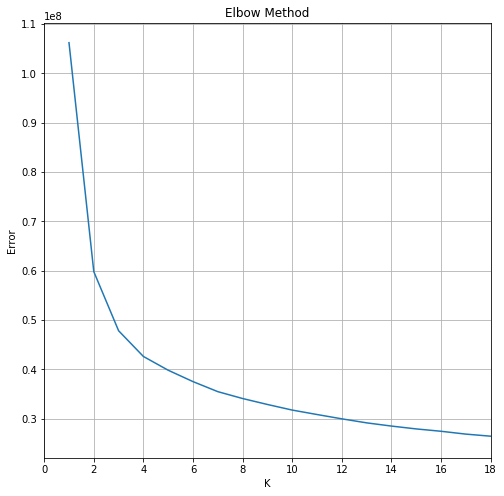

In [51]:
data_for_model = np.concatenate((tempo_scaled,audio_features_normalized,df[audio_genres_columns]),axis=1)

X = data_for_model

Ks = np.arange(1, 20)
[KMeans(n_clusters=i, random_state=1986) for i in Ks]
km = [KMeans(n_clusters=i, random_state=1986) for i in Ks]
score = [-km[i].fit(X).score(X) for i in range(len(km))]
Ks.dtype = int
plt.figure(figsize=(8,8))
plt.plot(Ks,score)
plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Elbow Method')

In [53]:
#K-means clustering doesn't appear to be a good choice here. 

# km = KMeans(n_clusters=9, n_init=10, random_state=1986)
# km.fit(X)
# labels = km.labels_
# cluster_centers = km.cluster_centers_
# labels_unique = np.unique(labels)
# n_clusters = len(labels_unique)
# km_clusters = pd.DataFrame(cluster_centers, columns=audio_cols)
# km_clusters['cluster'] = ['KM{}'.format(l) for l in labels_unique]
# km_clusters['method'] = 'KMeans'
# clusters = km_clusters
# cols = ['cluster'] + audio_cols + ['method']
# clusters = clusters[cols]

In [54]:
# clusters

In [55]:
# plt.figure(figsize=(10,10))
# sns.set(font_scale=1.5)
# sns.heatmap(
#     data=clusters.loc[clusters.method=='KMeans', audio_cols],
#     cmap='Purples',
#     annot=True
# )
# plt.ylabel("KMeansLabel")
# plt.savefig('heatmap_all.png')

In [96]:
pickle.dump( X, open( "./data/X_array.pkl", "wb" ) )

# DBSCAN Attempt - Takes too long on local machine - Will try Sagemaker

In [94]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, metric='euclidean', min_samples=50, n_jobs=-1) 

In [95]:
dbscan.fit(X)

KeyboardInterrupt: 

In [68]:
len(dbscan.labels_)

574018

In [67]:
len(set(dbscan.labels_))

14741

In [88]:
dbscan.labels_[1]

1

In [93]:
np.where(dbscan.labels_ == 1)[0]

array([     1,   7356,  29886,  41466,  46615, 155284, 183275, 189867,
       254445, 280660, 324065, 353040, 386550, 387436, 399202, 432767,
       439313])

In [90]:
for result in np.where(dbscan.labels_ == 1)[0]:
    display(pd.DataFrame(df.loc[result][10:11]),pd.DataFrame(df.loc[result][17:18]))

,1
songid,41RpZW2lxAdnqDd2nMBzLQ


,1
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


,7356
songid,5KrT43gJer7GAmW7lzDswI


,7356
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


,29886
songid,5U9yhINyd8DQzKOAcL3KxZ


,29886
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


,41466
songid,4g0iPH8W6MVIIsDmOma48J


,41466
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


,46615
songid,2ELdgpcrH5KTT3aZRjOFzq


,46615
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


,155284
songid,0lo18DoW62vTW9uyosl8aA


,155284
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


,183275
songid,3xVIcDuxudSY3Vcvx02pcl


,183275
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


,189867
songid,6GyahSBWjd9NOdVmnZdBwL


,189867
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


,254445
songid,0b2C1ICFJI0fT9E2iGmr7z


,254445
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


,280660
songid,6SWvFS3J48z1eED88Htg2x


,280660
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


,324065
songid,3niLZux4YrPkROBiQ5n10L


,324065
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


,353040
songid,5HfSwVjTloGEAluKw3T3nh


,353040
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


,386550
songid,6iHHO8hU7viCgZyU3LYi4i


,386550
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


,387436
songid,1ymVpc3PgmD4Fi5Udid5bS


,387436
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


,399202
songid,4Q2ghKdoEfrpleKAG03a5R


,399202
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


,432767
songid,2VYLZO3LakAgSWK9DTLWE3


,432767
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


,439313
songid,5jHWYX0vFoCTo9Vfi2oL5Y


,439313
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


# Genre Replace with 200 > Value_Counts

In [109]:
unique_genres = df_genres["genres"].value_counts().index

In [111]:
unique_genres

Index([''rock'', ''mellow gold'', ''dance pop'', ''country rock'',
       ''soft rock'', ''alternative rock'', ''classic rock'',
       ''adult standards'', ''new wave pop'', ''folk rock'',
       ...
       ''egyptian hip hop'', ''thai instrumental'',
       ''chinese classical performance'', ''police band'',
       ''cornetas y tambores'', ''fremantle indie'', ''murga'',
       ''deep eurodance'', ''tunisian pop'', ''african electronic''],
      dtype='object', length=3488)

In [236]:
df_genres["genres"].value_counts()

'rock'                  22625
'mellow gold'           12409
'dance pop'             12358
'country rock'          12306
'soft rock'             12065
                        ...  
'fremantle indie'           1
'murga'                     1
'deep eurodance'            1
'tunisian pop'              1
'african electronic'        1
Name: genres, Length: 3488, dtype: int64

In [10]:
high_occuring = []
for i in df_genres["genres"].value_counts().iteritems():
    if high_occuring == []:
        high_occuring.append(i)
        print("list_appended!")
        print(high_occuring)
        continue
    if i[1] > high_occuring[0][1]:
        vals = [(val)]
        print(vals)
    else:
        continue

print(high_occuring[0][0])

list_appended!
[("'rock'", 22625)]
'rock'


In [311]:
vals

[12409]

In [291]:
df_genres["genres"].value_counts()[0:10]

'rock'                22625
'mellow gold'         12409
'dance pop'           12358
'country rock'        12306
'soft rock'           12065
'alternative rock'    12038
'classic rock'        12029
'adult standards'     11381
'new wave pop'        11320
'folk rock'           11216
Name: genres, dtype: int64

In [286]:
vals[0][1]

22625

In [136]:
df_genres["genres"][df_genres["genres"].value_counts() > 200]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [334]:
high_occuring = df_genres["genres"].value_counts()[df_genres["genres"].value_counts() > 100]

In [335]:
high_occuring_list = high_occuring.index

In [13]:
def convert_to_list(string):
    return list(string.split(","))

In [174]:
df["genres_stripped"][0]

"'finnish indie', 'suomi rock'"

In [175]:
df["genres_stripped"][0].split(",")

["'finnish indie'", " 'suomi rock'"]

In [209]:
if "suomi rock" in df["pop_genres"][0]:
    print("yes")

In [212]:
df["pop_genres"]

0                          ['finnish indie',  'suomi rock']
1         ['bass music',  'scottish electronic',  'scott...
2                    ['hip hop',  'new jack swing',  'rap']
3                      ['bolero',  'mariachi',  'ranchera']
4                                    ['swedish indie rock']
                                ...                        
574013    ['art pop',  'brooklyn indie',  'chamber pop',...
574014                                      ['lo-fi beats']
574015    ['contemporary country',  'country pop',  'hea...
574016    ['garage rock',  'indie pop',  'indie rock',  ...
574017    ['ccm',  'christian music',  'world worship', ...
Name: pop_genres, Length: 574018, dtype: object

In [195]:
df["genres_stripped"][0]

"'finnish indie', 'suomi rock'"

In [14]:
df["pop_genres"] = df["genres_stripped"].apply(convert_to_list)

In [426]:
value = 'suomi rock'
value = "'" + value + "'"
df_genres["genres"].value_counts()[df_genres["genres"].value_counts().index == value ]

'suomi rock'    1712
Name: genres, dtype: int64

In [399]:
df_genres["genres"].value_counts().index == "'rock'"

array([ True, False, False, ..., False, False, False])

In [19]:
for item in df["pop_genres"][0:5]:
    high_occuring = []
    for genre in item:
        genre = genre.strip(" ")
        for i in df_genres["genres"].value_counts()[df_genres["genres"].value_counts().index == genre].iteritems():
            print(i)
            if high_occuring == []:
                high_occuring = [(i)]
                print("added 1st time")
                continue
            if i[1] > high_occuring[0][1]:
                print("replaced!")
                high_occuring = [(i)] 
            else:
                continue

    print(high_occuring[0][0])
    

("'finnish indie'", 317)
added 1st time
("'suomi rock'", 1712)
replaced!
'suomi rock'
("'bass music'", 888)
added 1st time
("'scottish electronic'", 140)
("'scottish hip hop'", 30)
("'uk experimental electronic'", 435)
("'wonky'", 1093)
replaced!
'wonky'
("'hip hop'", 10665)
added 1st time
("'new jack swing'", 3460)
("'rap'", 10578)
'hip hop'
("'bolero'", 2683)
added 1st time
("'mariachi'", 1685)
("'ranchera'", 5307)
replaced!
'ranchera'
("'swedish indie rock'", 1053)
added 1st time
'swedish indie rock'


In [23]:
def keep_highest_occuring(list):
    high_occuring = []
    for genre in list:
        genre = genre.strip(" ")   
        for i in df_genres["genres"].value_counts()[df_genres["genres"].value_counts().index == genre].iteritems():
            if high_occuring == []:
                high_occuring = [(i)]
                continue
            if i[1] > high_occuring[0][1]:
                high_occuring = [(i)] 
            else:
                continue
    print (high_occuring[0][0])    
    return high_occuring[0][0]

In [24]:
df["most_pop_genre"] = df["pop_genres"][:10].apply(keep_highest_occuring)

'suomi rock'
'wonky'
'hip hop'
'ranchera'
'swedish indie rock'
'semba'
'europop'
'new wave pop'
'groove metal'
'post-hardcore'


In [28]:
def keep_highest_occuring_2(list):
    val_counts_array = np.array(df_genres["genres"].value_counts().reset_index())
    high_occuring = []
    for genre in list:
        genre = genre.strip(" ")   
        for i in val_counts_array:
            if i[0] == genre:
                if high_occuring == []:
                    high_occuring = [(i)]
                    continue
                if i[1] > high_occuring[0][1]:
                    high_occuring = [(i)] 
                else:
                    continue
    return high_occuring[0][0]

In [ ]:
df["most_pop_genre"] = df["pop_genres"].apply(keep_highest_occuring_2)

In [1]:
df["most_pop_genre"][0:100]

NameError: name 'df' is not defined

In [ ]:
def keep_highest_occuring(list):
    high_occuring = []
    for i in df_genres["genres"].value_counts().iteritems():
        if high_occuring == []:
            high_occuring.append(i)
            print("list_appended!")
            print(high_occuring)
            continue
        if i[1] > high_occuring[0][1]:
            vals = [(val)] 
        else:
            continue

    return(high_occuring[0][0])

In [ ]:
df[["genres","pop_genres"]][df["genres"].str.contains("finnish indie")]

In [365]:
for item in df["genres"][0:4]:
    print(item)
#     high_occuring = []
#     for song in item:
#         for 
        

['finnish indie', 'suomi rock']
['bass music', 'scottish electronic', 'scottish hip hop', 'uk experimental electronic', 'wonky']
['hip hop', 'new jack swing', 'rap']
['bolero', 'mariachi', 'ranchera']


In [345]:
high_occuring_list

Index([''rock'', ''mellow gold'', ''dance pop'', ''country rock'',
       ''soft rock'', ''alternative rock'', ''classic rock'',
       ''adult standards'', ''new wave pop'', ''folk rock'',
       ...
       ''deep deep house'', ''vintage tango'', ''north carolina indie'',
       ''classic french pop'', ''italian black metal'', ''oceania soundtrack'',
       ''deep chill-out'', ''romanian rock'', ''christian dance'',
       ''middle earth''],
      dtype='object', length=1852)

In [346]:
df["pop_genres"][0:1].apply(remove_lower_occuring) 

item isn't popular:  'suomi rock'


0    None
Name: pop_genres, dtype: object

In [235]:
for item in df["genres_stripped"][0:20]:
    print(item)

'finnish indie', 'suomi rock'
'bass music', 'scottish electronic', 'scottish hip hop', 'uk experimental electronic', 'wonky'
'hip hop', 'new jack swing', 'rap'
'bolero', 'mariachi', 'ranchera'
'swedish indie rock'
'semba'
'classic swedish pop', 'europop', 'swedish pop'
'ectofolk', 'folk', 'lilith', 'new wave pop', 'pop rock', 'singer-songwriter', 'traditional folk'
'brutal death metal', 'death metal', 'deathgrind', 'groove metal', 'technical death metal'
'christian metal', 'christian rock', 'dreamo', 'post-hardcore', 'progressive post-hardcore', 'screamo'
'contemporary gospel', 'gospel'
'alternative americana', 'folk'
'alternative metal', 'groove metal', 'industrial metal', 'nu metal', 'rap rock'
'italian hip hop', 'italian reggae'
'gospel rap'
'free folk'
'deep disco', 'disco', 'turbo folk'
'album rock', 'art rock', 'blues rock', 'british blues', 'classic rock', 'classic uk pop', 'hard rock', 'progressive rock', 'psychedelic rock', 'rock', 'symphonic rock'
'zouk'
'alternative roots ro

In [229]:
for item in df["pop_genres"][0:100]:
    print(item)

["'finnish indie'"]
["'bass music'", " 'uk experimental electronic'", " 'wonky'"]
["'hip hop'", " 'new jack swing'", " 'rap'"]
["'bolero'", " 'mariachi'", " 'ranchera'"]
["'swedish indie rock'"]
["'semba'"]
["'classic swedish pop'", " 'europop'", " 'swedish pop'"]
["'ectofolk'", " 'folk'", " 'lilith'", " 'new wave pop'", " 'pop rock'", " 'singer-songwriter'", " 'traditional folk'"]
["'brutal death metal'", " 'death metal'", " 'deathgrind'", " 'groove metal'", " 'technical death metal'"]
["'christian metal'", " 'christian rock'", " 'dreamo'", " 'post-hardcore'", " 'progressive post-hardcore'", " 'screamo'"]
["'contemporary gospel'", " 'gospel'"]
["'alternative americana'", " 'folk'"]
["'alternative metal'", " 'groove metal'", " 'industrial metal'", " 'nu metal'", " 'rap rock'"]
["'italian hip hop'", " 'italian reggae'"]
["'gospel rap'"]
["'free folk'"]
["'deep disco'", " 'disco'", " 'turbo folk'"]
["'album rock'", " 'art rock'", " 'blues rock'", " 'british blues'", " 'classic rock'", " 

In [224]:
df["pop_genres"].isna().sum()

0

In [170]:
df.columns

Index([    'acousticness',           'artist',     'danceability',
            'duration_ms',           'energy', 'instrumentalness',
                    'key',         'liveness',         'loudness',
                   'mode',           'songid',      'speechiness',
                  'tempo',   'time_signature',            'track',
                'valence',           'genres',  'genres_stripped',
                        0,                  1,                  2,
                        3,                  4,                  5,
                        6,                  7,                  8,
                        9,                 10,                 11,
                       12,                 13,                 14,
                       15,                 16,                 17,
                       18,                 19,                 20,
                       21,                 22,                 23,
                       24,                 25,                

In [155]:
with open('./DF_genres_hashed.pkl', 'rb') as f:
    df = pickle.load(f)

In [200]:
genre

"'worship'"